In [1]:
from ecg_file_loader import ECGFileLoader
import matplotlib.pyplot as plt
import numpy as np

In [6]:
loader = ECGFileLoader()
patient_data = loader.get_ecg_with_annotations('sub-001')
patient_data[0]

INFO:ecg_file_loader:Processing sub-001 run 01
INFO:ecg_file_loader:Loaded ECG data from /Volumes/Seizury/ds005873/sub-001/ses-01/ecg/sub-001_ses-01_task-szMonitoring_run-01_ecg.edf
INFO:ecg_file_loader:ECG channels: ['ECG SD']
INFO:ecg_file_loader:Sampling frequency: 256.0 Hz
INFO:ecg_file_loader:Duration: 65319.00 seconds
INFO:ecg_file_loader:Loaded EEG data from /Volumes/Seizury/ds005873/sub-001/ses-01/eeg/sub-001_ses-01_task-szMonitoring_run-01_eeg.edf
INFO:ecg_file_loader:Loaded annotations from /Volumes/Seizury/ds005873/sub-001/ses-01/eeg/sub-001_ses-01_task-szMonitoring_run-01_events.tsv
INFO:ecg_file_loader:Columns: ['onset', 'duration', 'eventType', 'lateralization', 'localization', 'vigilance', 'confidence', 'channels', 'dateTime', 'recordingDuration']
INFO:ecg_file_loader:Number of annotations: 2
INFO:ecg_file_loader:Processing sub-001 run 02
INFO:ecg_file_loader:Loaded ECG data from /Volumes/Seizury/ds005873/sub-001/ses-01/ecg/sub-001_ses-01_task-szMonitoring_run-02_ecg.edf

{'patient_id': 'sub-001',
 'run_number': '01',
 'ecg_file': '/Volumes/Seizury/ds005873/sub-001/ses-01/ecg/sub-001_ses-01_task-szMonitoring_run-01_ecg.edf',
 'eeg_file': '/Volumes/Seizury/ds005873/sub-001/ses-01/eeg/sub-001_ses-01_task-szMonitoring_run-01_eeg.edf',
 'annotation_file': '/Volumes/Seizury/ds005873/sub-001/ses-01/eeg/sub-001_ses-01_task-szMonitoring_run-01_events.tsv',
 'ecg_data': <RawEDF | sub-001_ses-01_task-szMonitoring_run-01_ecg.edf, 1 x 16721664 (65319.0 s), ~127.6 MiB, data loaded>,
 'eeg_data': <RawEDF | sub-001_ses-01_task-szMonitoring_run-01_eeg.edf, 2 x 16721664 (65319.0 s), ~255.2 MiB, data loaded>,
 'annotations':      onset  duration eventType  lateralization  localization  vigilance  \
 0  14080.0      84.0      impd             NaN           NaN        NaN   
 1  23838.0       8.0      impd             NaN           NaN        NaN   
 
    confidence  channels             dateTime  recordingDuration  
 0         NaN       NaN  2000-01-01 00:00:00           

In [3]:
def plot_ecg_with_seizures(ecg_raw, seizure_events):
    """
    Simple plotting function to visualize ECG with seizure annotations.
    
    Args:
        ecg_raw: MNE Raw object with ECG data
        seizure_events: List of seizure events
    """
    try:
        # Get ECG data (first channel if multiple)
        ecg_data = ecg_raw.get_data()[0]  # First channel
        times = ecg_raw.times
        
        plt.figure(figsize=(15, 6))
        plt.plot(times, ecg_data * 1e6, 'b-', linewidth=0.5, label='ECG')  # Convert to microvolts
        
        # Mark seizure events
        for i, event in enumerate(seizure_events):
            onset = event['onset_time']
            duration = event['duration']
            end_time = onset + duration
            
            # Highlight seizure period
            plt.axvspan(onset, end_time, alpha=0.3, color='red', 
                       label=f'Seizure {i+1}' if i == 0 else "")
            
            # Add text annotation
            plt.text(onset, plt.ylim()[1] * 0.9, f'S{i+1}', 
                    verticalalignment='top', fontsize=8, color='red')
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('ECG (μV)')
        plt.title('ECG Signal with Seizure Annotations')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting: {e}")


/var/folders/x6/3ljkq6l9301fxqkpg3n51z5h0000gn/T/ipykernel_99208/3791099169.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/pietrosaveri/Desktop/Pietro/•StartUps/Seizury/• src_blocks/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


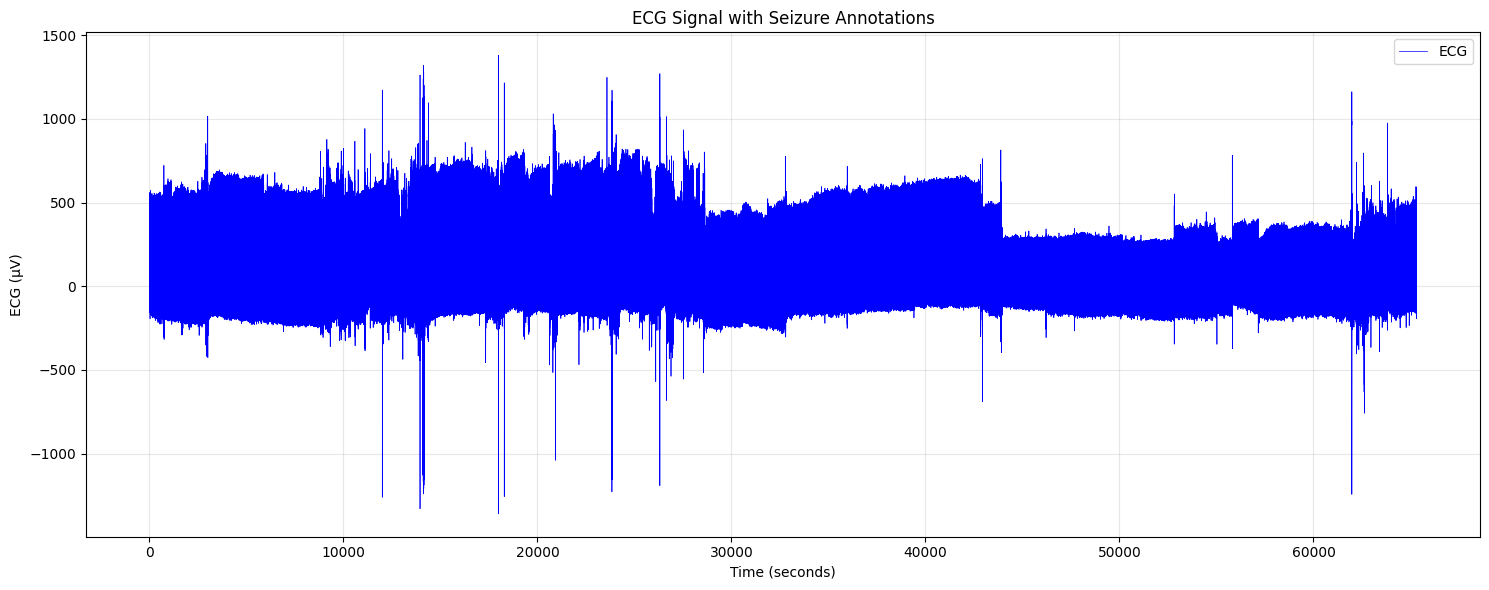

In [11]:
# Plot the seizure events on the ECG signal for the first run
plot_ecg_with_seizures(
    patient_data[0]['ecg_data'],
    patient_data[0]['seizure_events']
)